## Example 5.3: Use the Monte Carlo integration method with the variance reduction to calculate the integral $\int_0^1 \frac{ \mathrm{d} x } { 1 + x^2 }$ over the same number of points as in Example 5.2. Make a plot comparing to the error calculated in Example 5.2. 

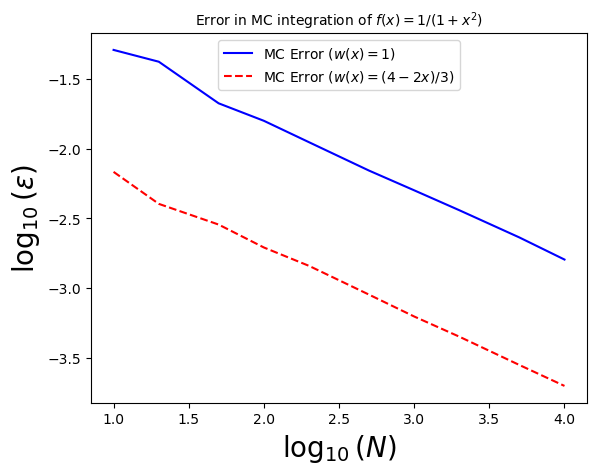

In [2]:
import math
import random # we need random numbers for the Monte Carlo method!
import numpy as np

# Let's define a function that performs one-dimensional MC integration of an arbitrary for N points
# We'll also make it capable of performing the integration in an interval a,b
# And we'll also implement the variance reduction method, with a "weightfunc" representing w(x)
# and "xfunc" representing the inversion of the transformed variable, x(y).
# w(x) = 1 and x(y) = y, should recover our previous results
def mcint_varred(func, weightfunc, xfunc, a, b, N):
    """Calculates the one-dimensional Monte Carlo integral of func in [a,b] for N points"""
    sumf = 0 # we will use this variable for the sum of f(x_i)
    sumfsq = 0 # and this one for the sum of f(x_i)^2, used in the error calculation
    for i in range(int(N)):
        xi = (b-a) * xfunc(random.random()) + a
        sumf = sumf + func(xi)/weightfunc(xi)
        sumfsq = sumfsq + (func(xi)/weightfunc(xi))**2 
    # now calculate the average value of f (i.e. the integral):
    I = sumf/N
    # and the error: 
    sigmaIsq = (1/N) * ( (1/N) * sumfsq - I**2 ) # this is the variance (i.e. the error squared)
    sigmaI = math.sqrt(sigmaIsq) # this is the actual error
    return I, sigmaI # return the integral and its error

# Now let's also define the function that we wish to integrate:
def f(x):
    return 1/(1+x**2)

# define the variable to use without the variance reduction:
def x(y):
    return y

# define a flat weight function:
def w(x):
    return 1

# define the inversion of the change of variables
def xvarred(y): 
    return 2 - np.sqrt((4 - 3*y))

# define the weight function:
def wvarred(x):
    return (4 - 2 * x)/3


# The array of the number of points to integrate over:
Narray = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
Intarray = []
Errarray = []
Intarray_varred = []
Errarray_varred = []

# loop over the number of points N
for N in Narray:
    # first calculate the result with no variance reduction
    Int, Err = mcint_varred(f,w,x,0,1,N) # this way you can access both the integral and its error
    Intarray.append(Int)
    Errarray.append(Err)
    # calculate the result with variance reduction
    Intv, Errv = mcint_varred(f,wvarred,xvarred,0,1,N) # this way you can access both the integral and its error
    Intarray_varred.append(Intv)
    Errarray_varred.append(Errv)

# Now let's plot! 
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

# Now plot! Don't forget the different labels! 
fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$\log_{10}(N)$', fontsize=20) # set the x label
ax.set_ylabel(r'$\log_{10}(\varepsilon)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title(r'Error in MC integration of $f(x)=1/(1+x^2)$', fontsize=10) # set the title 

# make a one-dimensional plot:
ax.plot(np.log10(Narray), np.log10(Errarray), label='MC Error ($w(x)=1$)', ls='-', color='blue') 
ax.plot(np.log10(Narray), np.log10(Errarray_varred), label='MC Error ($w(x)=(4 - 2x)/3$)', ls='--', color='red') 


# construct the legend:
ax.legend(loc='upper center')  # Add a legend

plt.show() # show the plot here
